In [36]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
%matplotlib inline
import seaborn as sns # type: ignore
from scipy.stats import ttest_ind, chi2_contingency # type: ignore
from sklearn import metrics 
from sklearn.metrics import classification_report
import statsmodels.api as sm # type: ignore
from statsmodels.formula.api import ols # type: ignore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings # type: ignore
import pickle
warnings.filterwarnings('ignore')
import os

In [2]:
df = pd.read_csv("./data/Diabetes-dataset.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.shape

(768, 9)

In [4]:
columns = df.columns
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Analyse EDA

### Traitement des données

#### Valeurs manquantes

In [ ]:
df.isnull().sum().sum() # Pas de valeurs nulles

0

#### Valeurs aberrantes

<Axes: title={'center': 'Outcome'}>

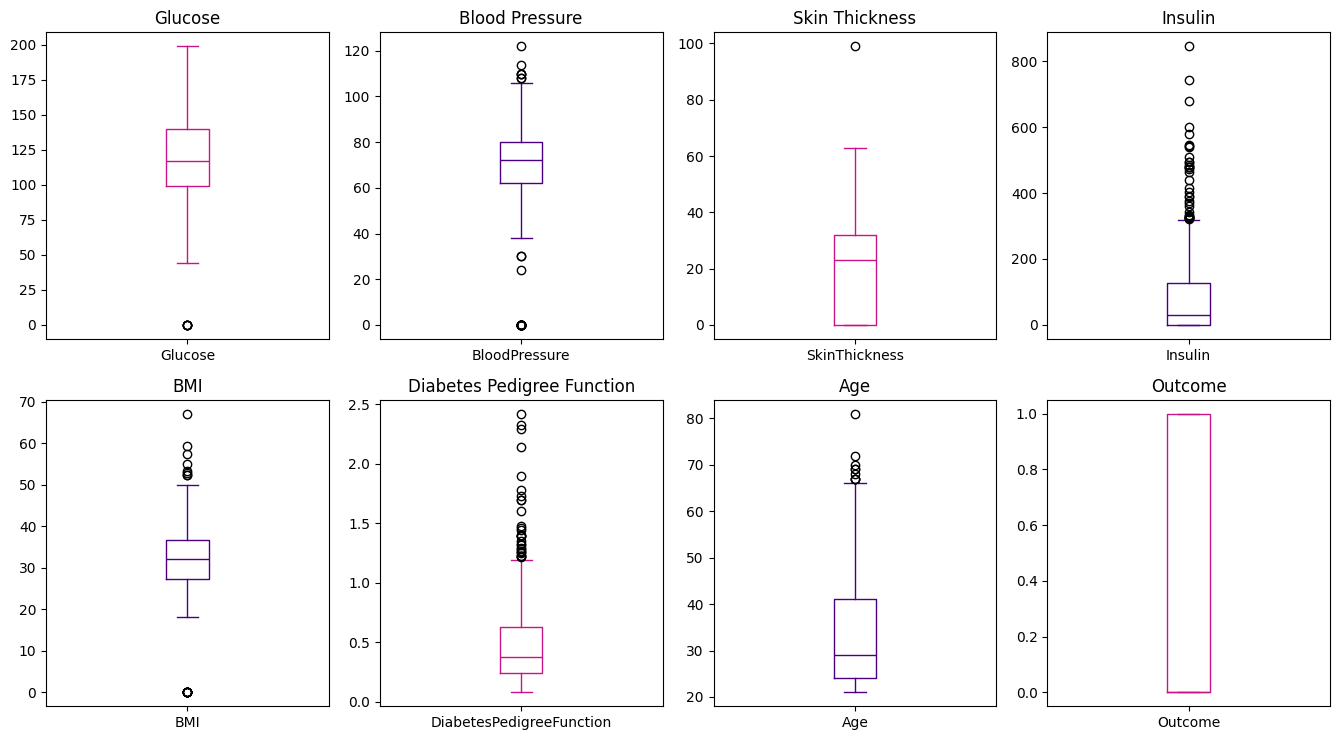

In [ ]:
plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(2, 4)

df['Glucose'].plot.box(title="Glucose",ax=axis[0][0],color="MEDIUMVIOLETRED")
df['BloodPressure'].plot.box(title="Blood Pressure",ax=axis[0][1],color="INDIGO")
df['SkinThickness'].plot.box(title="Skin Thickness",ax=axis[0][2],color="MEDIUMVIOLETRED")
df['Insulin'].plot.box(title="Insulin",ax=axis[0][3],color="INDIGO")
df['BMI'].plot.box(title="BMI",ax=axis[1][0],color="INDIGO")
df['DiabetesPedigreeFunction'].plot.box(title="Diabetes Pedigree Function",ax=axis[1][1],color="MEDIUMVIOLETRED")
df['Age'].plot.box(title="Age",ax=axis[1][2],color="INDIGO")
df['Outcome'].plot.box(title="Outcome",ax=axis[1][3],color="MEDIUMVIOLETRED")

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### Valeurs aberrantes glucose

In [10]:
Q1 = df.Glucose.quantile(0.25)
Q3 = df.Glucose.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['Glucose']<=lower_limit,'Glucose'] = np.mean(df['Glucose'])
df.loc[df['Glucose']>upper_limit, 'Glucose'] = np.mean(df['Glucose'])

#### Valeurs aberrantes pression sanguine

In [11]:
Q1 = df.BloodPressure.quantile(0.25)
Q3 = df.BloodPressure.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['BloodPressure']<=lower_limit,'BloodPressure'] = np.mean(df['BloodPressure'])
df.loc[df['BloodPressure']>upper_limit,'BloodPressure'] = np.mean(df['BloodPressure'])

In [12]:
Q1 = df.SkinThickness.quantile(0.25)
Q3 = df.SkinThickness.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['SkinThickness']<=lower_limit,'SkinThickness'] = np.mean(df['SkinThickness'])
df.loc[df['SkinThickness']>upper_limit,'SkinThickness'] = np.mean(df['SkinThickness'])

In [13]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['Insulin']<=lower_limit,'Insulin'] = np.mean(df['Insulin'])
df.loc[df['Insulin']>upper_limit,'Insulin'] = np.mean(df['Insulin'])

In [14]:
Q1 = df.BMI.quantile(0.25)
Q3 = df.BMI.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['BMI']<=lower_limit,'BMI'] = np.mean(df['BMI'])
df.loc[df['BMI']>upper_limit,'BMI'] = np.mean(df['BMI'])

In [15]:
Q1 = df.DiabetesPedigreeFunction.quantile(0.25)
Q3 = df.DiabetesPedigreeFunction.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['DiabetesPedigreeFunction']<=lower_limit,'DiabetesPedigreeFunction'] = np.mean(df['DiabetesPedigreeFunction'])
df.loc[df['DiabetesPedigreeFunction']>upper_limit,'DiabetesPedigreeFunction'] = np.mean(df['DiabetesPedigreeFunction'])

In [16]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['Age']<=lower_limit,'Age'] = np.mean(df['Age'])
df.loc[df['Age']>upper_limit,'Age'] = np.mean(df['Age'])

In [17]:
Q1 = df.Outcome.quantile(0.25)
Q3 = df.Outcome.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['Outcome']<=lower_limit,'Outcome'] = np.mean(df['Outcome'])
df.loc[df['Outcome']>upper_limit,'Outcome'] = np.mean(df['Outcome'])

<Axes: title={'center': 'Outcome'}>

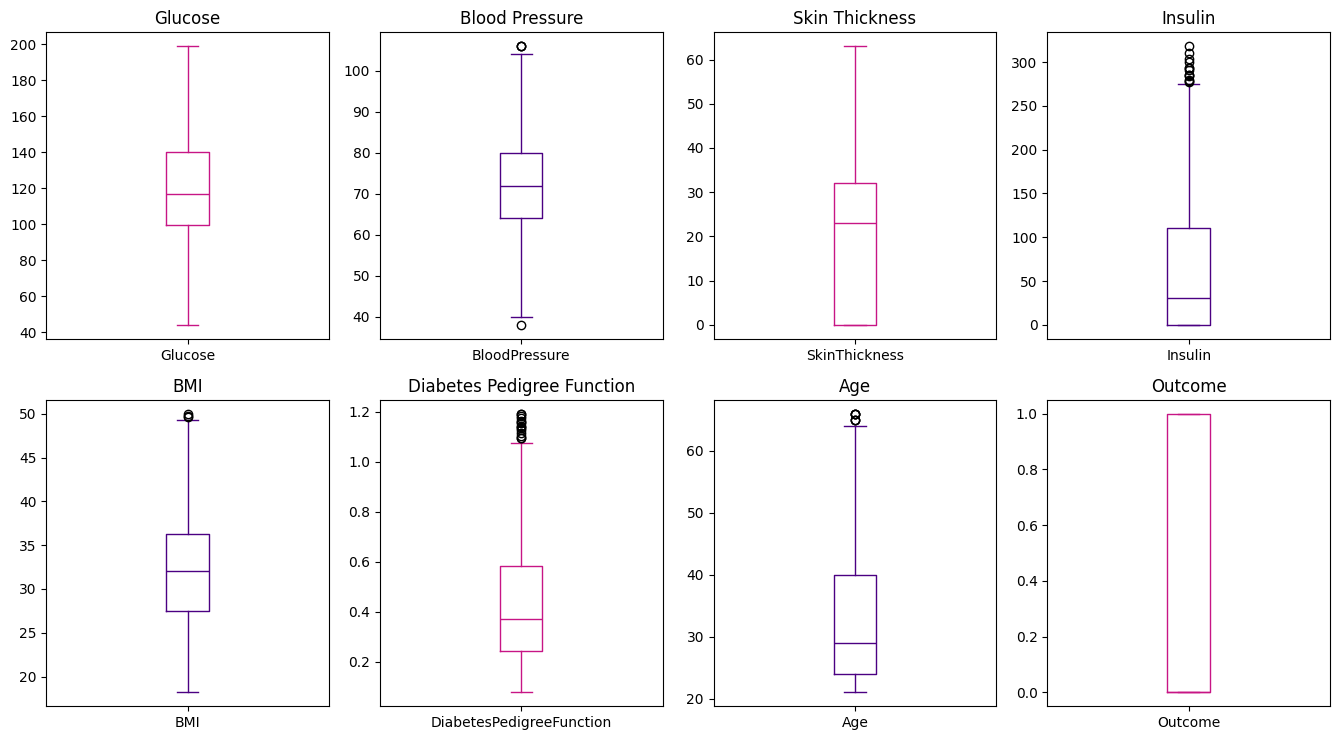

In [18]:
plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(2, 4)
  
df['Glucose'].plot.box(title="Glucose",ax=axis[0][0],color="MEDIUMVIOLETRED")
df['BloodPressure'].plot.box(title="Blood Pressure",ax=axis[0][1],color="INDIGO")
df['SkinThickness'].plot.box(title="Skin Thickness",ax=axis[0][2],color="MEDIUMVIOLETRED")
df['Insulin'].plot.box(title="Insulin",ax=axis[0][3],color="INDIGO")
df['BMI'].plot.box(title="BMI",ax=axis[1][0],color="INDIGO")
df['DiabetesPedigreeFunction'].plot.box(title="Diabetes Pedigree Function",ax=axis[1][1],color="MEDIUMVIOLETRED")
df['Age'].plot.box(title="Age",ax=axis[1][2],color="INDIGO")
df['Outcome'].plot.box(title="Outcome",ax=axis[1][3],color="MEDIUMVIOLETRED")

#### Histogramme des différentes colonnes

<Axes: title={'center': 'Outcome'}, ylabel='Frequency'>

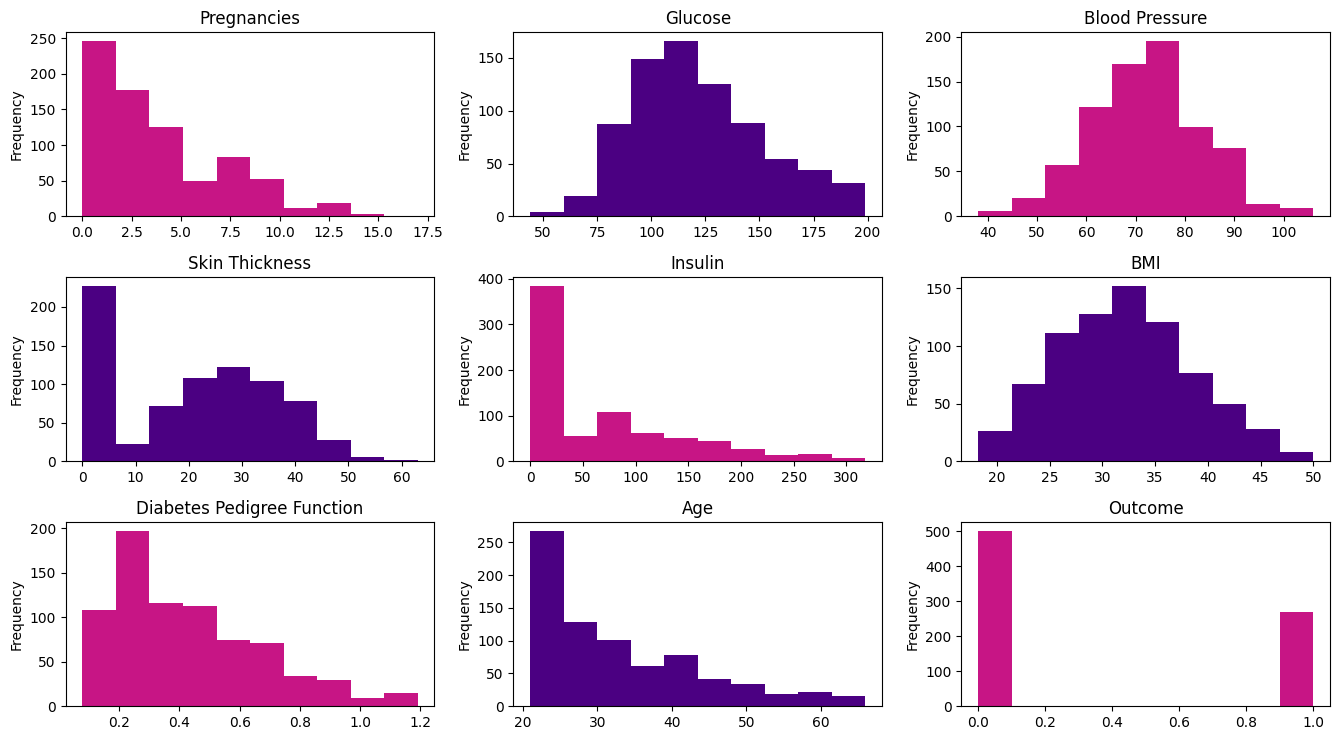

In [ ]:
plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(3, 3)
  
df['Pregnancies'].plot.hist(title="Pregnancies",ax=axis[0][0],color="MEDIUMVIOLETRED")
df['Glucose'].plot.hist(title="Glucose",ax=axis[0][1],color="INDIGO")
df['BloodPressure'].plot.hist(title="Blood Pressure",ax=axis[0][2],color="MEDIUMVIOLETRED")
df['SkinThickness'].plot.hist(title="Skin Thickness",ax=axis[1][0],color="INDIGO")
df['Insulin'].plot.hist(title="Insulin",ax=axis[1][1],color="MEDIUMVIOLETRED")
df['BMI'].plot.hist(title="BMI",ax=axis[1][2],color="INDIGO")
df['DiabetesPedigreeFunction'].plot.hist(title="Diabetes Pedigree Function",ax=axis[2][0],color="MEDIUMVIOLETRED")
df['Age'].plot.hist(title="Age",ax=axis[2][1],color="INDIGO")
df['Outcome'].plot.hist(title="Outcome",ax=axis[2][2],color="MEDIUMVIOLETRED")

#### Heatmap

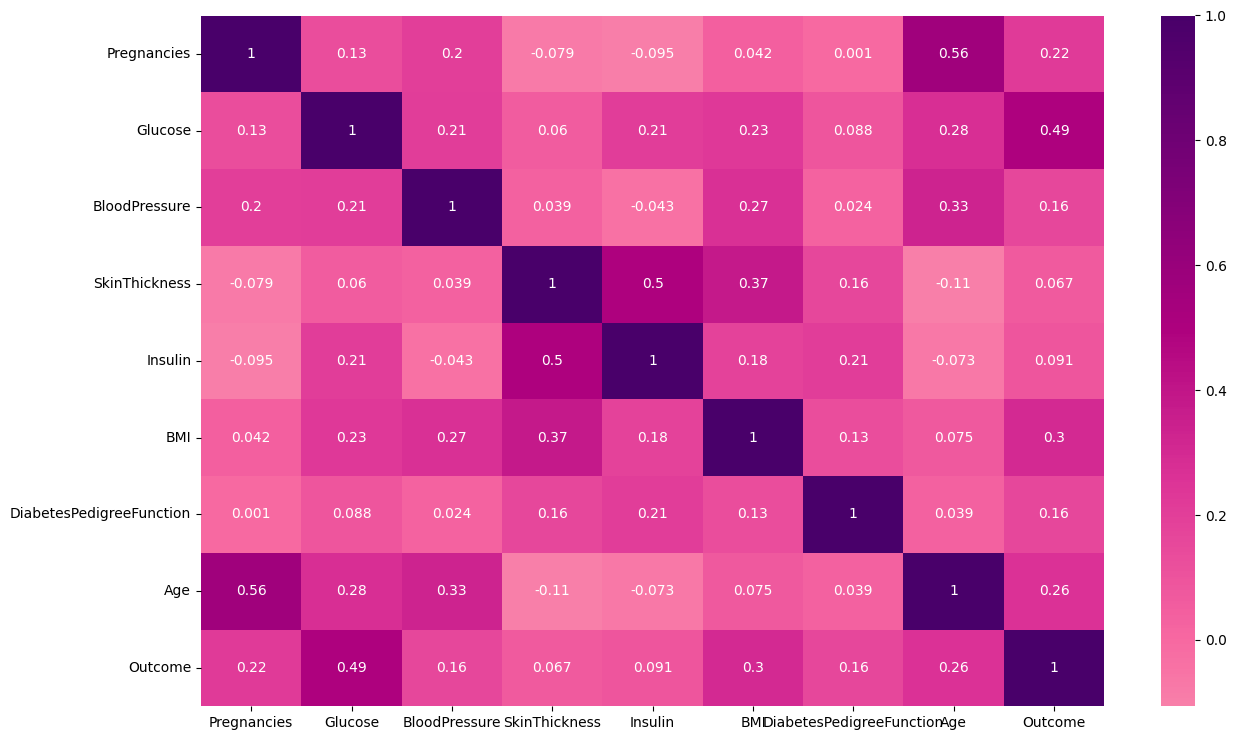

In [20]:
dataplot = sns.heatmap(df.corr(), cmap='RdPu', annot=True, center=0)

## Entrainement du modèle

In [26]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, shuffle=True, random_state=42)

In [32]:
lr = LogisticRegression(random_state=16)

In [33]:
lr.fit(X_train, Y_train)

LogisticRegression(random_state=16)

In [34]:
Y_pred = lr.predict(X_test)

### Metriques

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Métrique")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[77 22]
 [18 37]]
Accuracy by confusion matrix: 0.7402597402597403


                  precision    recall  f1-score   support

without diabetes       0.81      0.78      0.79        99
   with diabetes       0.63      0.67      0.65        55

        accuracy                           0.74       154
       macro avg       0.72      0.73      0.72       154
    weighted avg       0.75      0.74      0.74       154

----------------------------------------------------------------------


## Sauvegardement du fichier

In [37]:
pickle.dump(lr, open('lr.pkl','wb'))